In [1]:
import matplotlib.pyplot as plt
import pandas as pd   
import graphviz       
from sklearn import tree
%matplotlib inline

In [2]:
# read data

df = pd.read_csv('bank-customer.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
# variable y, customer whether a customer has converted or subscribed to a term deposit

df['conversion'] = df['y'].apply(lambda x : 0 if x == 'no' else 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [5]:
df.groupby('conversion').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
conversion,,,,,,,,,,,,,,,,,
0,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
1,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [6]:
df.groupby('conversion').count()['y']

conversion
0    39922
1     5289
Name: y, dtype: int64

In [7]:
# conversion rate dataframe

conversion_rate_df = pd.DataFrame(df.groupby('conversion').count()['y'] / df.shape[0] * 100)
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [8]:
pd.DataFrame(df.groupby(by='job')['conversion'])

,0,1
0,admin.,10 0 11 0 16 0 25 0 32...
1,blue-collar,3 0 17 0 20 0 22 0 33...
2,entrepreneur,2 0 7 0 27 0 55 0 94...
3,housemaid,140 0 212 0 218 0 400 0 47...
4,management,0 0 5 0 6 0 21 0 26...
5,retired,8 0 15 0 18 0 24 0 43...
6,self-employed,46 0 84 0 112 0 141 0 20...
7,services,14 0 19 0 23 0 40 0 59...
8,student,151 0 203 0 265 0 292 0 29...
9,technician,1 0 9 0 12 0 13 0 29...


In [9]:
df.groupby(by='job')['conversion'].sum()

job
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
Name: conversion, dtype: int64

In [10]:
df.groupby(by='job')['conversion'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: conversion, dtype: int64

In [11]:
# conversion rate by job

conversion_rate_by_job = df.groupby(by='job')['conversion'].sum() / df.groupby(by='job')['conversion'].count() * 100
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

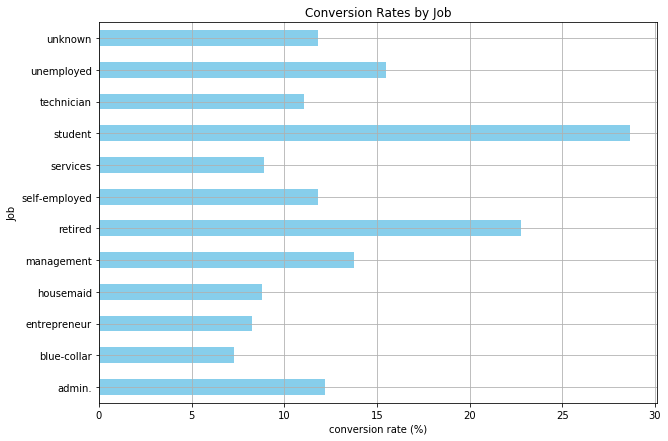

In [12]:
# plotting conversion rate by job

ax = conversion_rate_by_job.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Job'
)
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')
plt.show()

In [13]:
# default rate by conversion

default_by_conversion_df = pd.pivot_table(
    df,
    values='y',
    index='default',
    columns='conversion',
    aggfunc=len
)
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


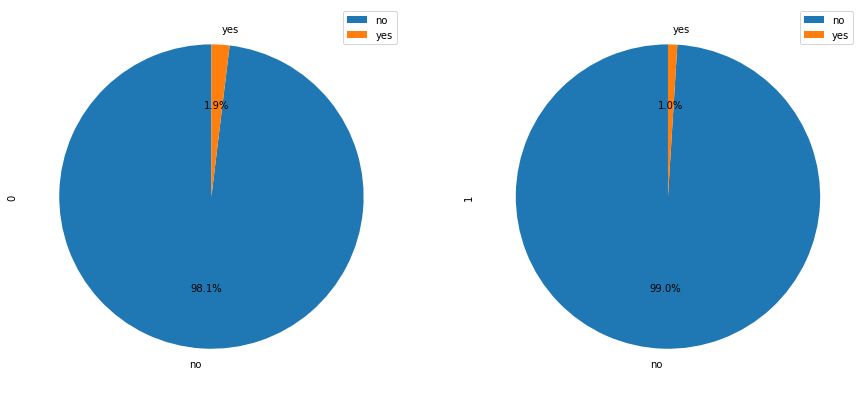

In [14]:
# plotting default rate by conversion

default_by_conversion_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x : '%0.1f%%' % x
)
plt.show()

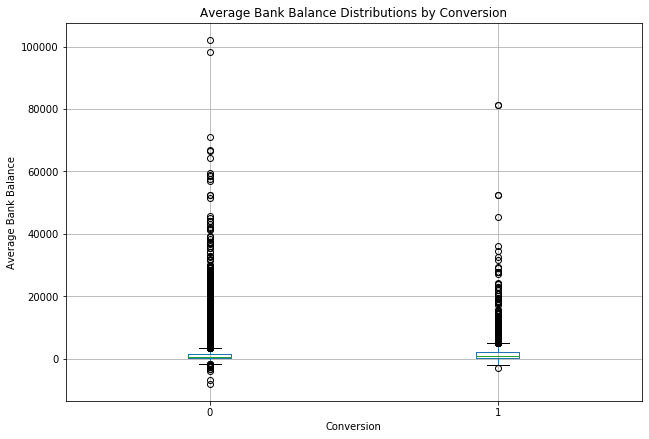

In [15]:
# bank balances by conversioin(showfliers true)

ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=True,
    figsize=(10, 7)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

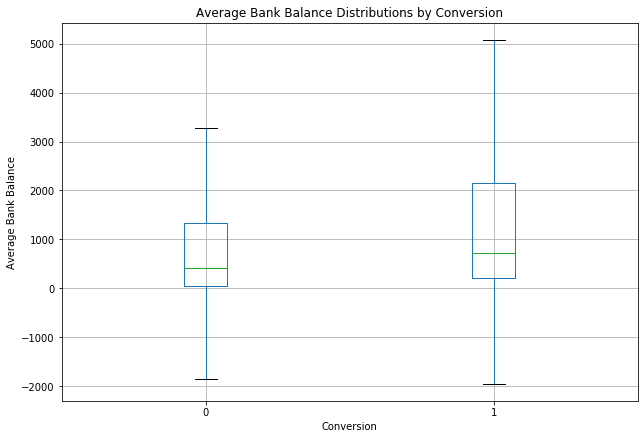

In [16]:
# bank balances by conversioin(showfliers false)

ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=False,
    figsize=(10, 7)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

In [17]:
# conversion rates by number of contacts

conversions_by_num_contacts = df.groupby(by='campaign')['conversion'].sum() / df.groupby(by='campaign')['conversion'].count() * 100
conversions_by_num_contacts

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
11     7.960199
12     2.580645
13     4.511278
14     4.301075
15     4.761905
16     2.531646
17     8.695652
18     0.000000
19     0.000000
20     2.325581
21     2.857143
22     0.000000
23     0.000000
24     5.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     6.250000
30     0.000000
31     0.000000
32    11.111111
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
41     0.000000
43     0.000000
44     0.000000
46     0.000000
50     0.000000
51     0.000000
55     0.000000
58     0.000000
63     0.000000
Name: conversion, dtype: float64

In [18]:
pd.DataFrame(conversions_by_num_contacts)

,conversion
campaign,
1,14.597583
2,11.203519
3,11.193624
4,9.000568
5,7.879819
6,7.126259
7,6.394558
8,5.925926
9,6.422018


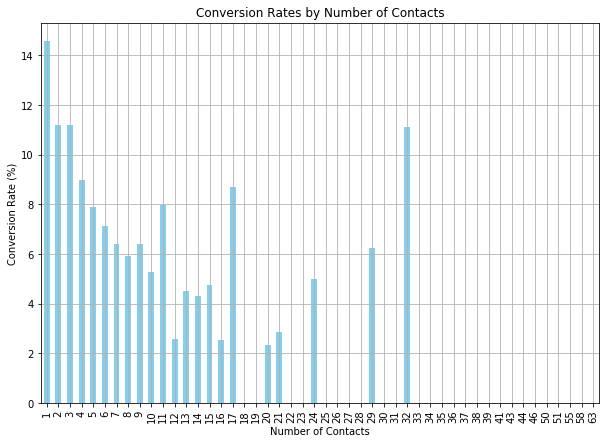

In [19]:
# plotting conversions_by_num_contacts

ax = conversions_by_num_contacts.plot(
    kind='bar',
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='skyblue'
)
ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

### encoding categorical variables

In [20]:
# encoding month

df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [21]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = df['month'].apply(lambda x : months.index(x)+1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0


In [22]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [23]:
# conversion by monthly group

df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

In [24]:
# encoding jobs

df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [25]:
# creates one dummy variable for each category(the job variable)

jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# rename the columns by prefixing each column w/job_

jobs_encoded_df.columns = ['job_%s' %x for x in jobs_encoded_df.columns]
jobs_encoded_df.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')

In [27]:
# concatenate the second DataFrame to the first DataFrame as columns

df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


In [28]:
# encoding marital
# create dummy variables for each category of the marital variable

marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,0,1,0
6,0,0,1
7,1,0,0
8,0,1,0
9,0,0,1


In [29]:
# rename the columns by prefixing each column w/marital_

marital_encoded_df.columns = ['marital_%s' %x for x in marital_encoded_df.columns]
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [30]:
# concatenate the second DataFrame to the first DataFrame as columns

df = pd.concat([df, marital_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


In [31]:
# encoding the housing variables

df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

In [32]:
# encoding the loan variables

df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [33]:
# features for fitting

features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

In [34]:
# response variable for fitting

response_var = 'conversion'

In [35]:
# building decision trees

dt_model = tree.DecisionTreeClassifier(max_depth=4)

In [36]:
# fitting

dt_model.fit(df[features], df[response_var])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
# interpreting decision tree

dot_data = tree.export_graphviz(
    dt_model,
    feature_names=features,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydotplus

C:\Users\ba4ws\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


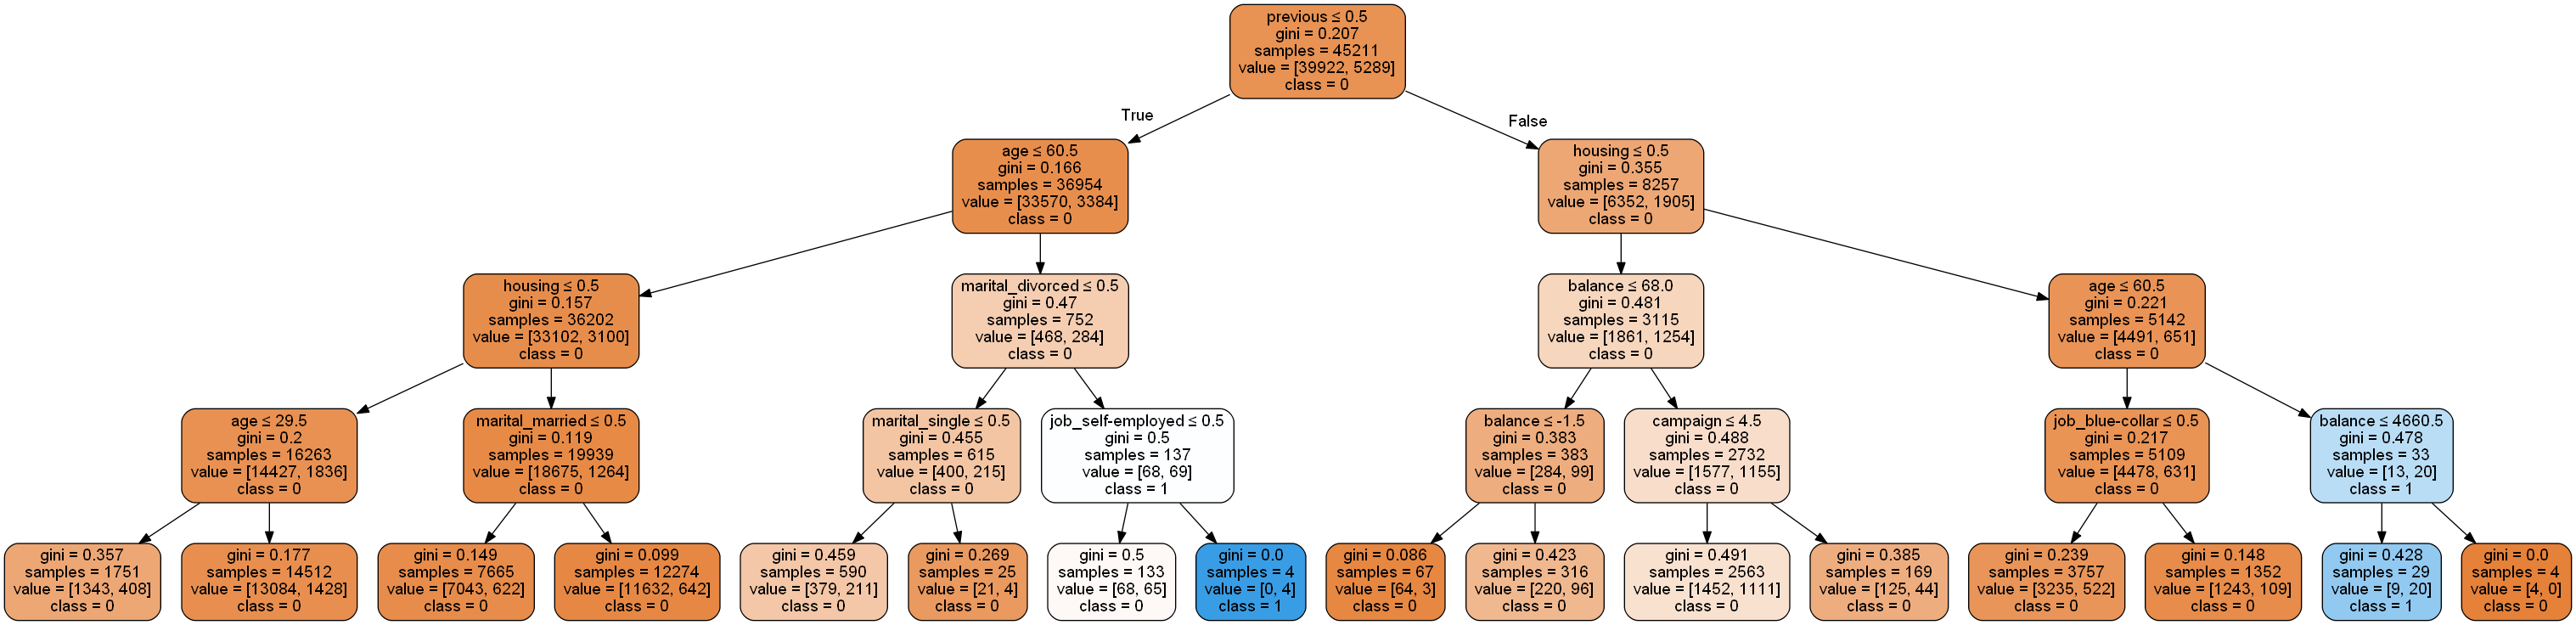

In [39]:
dot_data = StringIO()
tree.export_graphviz(
    dt_model,
    out_file=dot_data,
    feature_names=features,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())